In [ ]:
#TASK 1
#2025년 6월 1일 스팀 스토어(비디오 게임 판매 프랫폼) 공식 베스트셀러
#순위 기준 - 판매 수익 기준 (정확히 알려져 있지는 않으나 게임 출시로 부터 당시까지의 판매수익이 아닌 임의로 설정된 단기 기간 동안의 판매수익)

#출처- H. Buğra Eken의 Best-Selling Steam Games of All Time(Steam, GameFAQs, SteamDB의 데이터 종합)


In [1]:
import pandas as pd
d=pd.read_csv('bestSelling_games.csv')
d.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000


In [ ]:
#TASK 2

In [2]:
#데이터 크기, 정보
d.shape

(2380, 15)

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_name            2380 non-null   object 
 1   reviews_like_rate    2380 non-null   int64  
 2   all_reviews_number   2380 non-null   int64  
 3   release_date         2380 non-null   object 
 4   developer            2380 non-null   object 
 5   user_defined_tags    2380 non-null   object 
 6   supported_os         2380 non-null   object 
 7   supported_languages  2380 non-null   object 
 8   price                2380 non-null   float64
 9   other_features       2380 non-null   object 
 10  age_restriction      2380 non-null   int64  
 11  rating               2380 non-null   float64
 12  difficulty           2380 non-null   int64  
 13  length               2380 non-null   int64  
 14  estimated_downloads  2380 non-null   int64  
dtypes: float64(2), int64(6), object(7)
mem

In [4]:
#결측치-없음
d.isnull().sum()

game_name              0
reviews_like_rate      0
all_reviews_number     0
release_date           0
developer              0
user_defined_tags      0
supported_os           0
supported_languages    0
price                  0
other_features         0
age_restriction        0
rating                 0
difficulty             0
length                 0
estimated_downloads    0
dtype: int64

In [5]:
#중복 데이터-없음
d.duplicated().sum()

np.int64(0)

In [6]:
d['year']=d['release_date'].astype(str).str.strip().str[-4:].astype('Int64')
#출시일에서 출시년도 추출

In [7]:
d['language_count']=d['supported_languages'].str.split(',').str.len()
d['language_count']=d['language_count'].fillna(0).astype(int)
#게임에서 지원하는 언어의 수 계산

In [8]:
#변수 설명
c=pd.DataFrame({'영문':list(d.columns),'한글':['게임 이름','총 리뷰 대비 좋아요 비율(%)','총 리뷰 수','출시일','개발사','게임 유저가 직접 지정한 태그(장르 및 특징)','지원 os','지원 언어','가격($)','게임 플레이 인원 수 및 기타 사항','연령 제한','평가','난이도','필요 플레이 타임','예상된 다운로드 건수 (판매량)','출시년도','지원 언어 수']})
c
#단 평가, 난이도, 필요 플레이 타임의 경우 해당 게임이나 스팀에서 직접 제공하는 것이 아닌 
#GameFAQs(비디오 게임을 다루는 외부 웹사이트)에서 제공하는 데이터
#예상된 다운로드 건수는 SteamDB(스팀의 데이터를 수집, 제공하는 비공식 통계 사이트)에서 제공

,영문,한글
0,game_name,게임 이름
1,reviews_like_rate,총 리뷰 대비 좋아요 비율(%)
2,all_reviews_number,총 리뷰 수
3,release_date,출시일
4,developer,개발사
5,user_defined_tags,게임 유저가 직접 지정한 태그(장르 및 특징)
6,supported_os,지원 os
7,supported_languages,지원 언어
8,price,가격($)
9,other_features,게임 플레이 인원 수 및 기타 사항


In [9]:
d.describe()

,reviews_like_rate,all_reviews_number,price,age_restriction,rating,difficulty,length,estimated_downloads,year,language_count
count,2380.000000,2.380000e+03,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2.380000e+03,2380.0,2380.000000
mean,82.413445,3.161508e+04,10.509130,10.605462,3.228017,2.864706,22.965126,2.523007e+06,2020.386555,10.941176
std,12.643745,2.137197e+05,11.344576,6.395752,0.771203,0.975194,21.247556,1.118283e+07,4.809195,13.176491
min,20.000000,1.000000e+01,0.000000,0.000000,0.390000,1.000000,1.000000,9.000000e+01,1994.0,1.000000
25%,76.000000,3.420000e+02,2.990000,10.000000,2.750000,2.000000,6.000000,3.500000e+04,2018.0,4.000000
50%,85.000000,2.106500e+03,7.990000,13.000000,3.380000,3.000000,16.000000,2.171500e+05,2022.0,10.000000
75%,92.000000,1.303000e+04,12.490000,17.000000,3.810000,3.000000,34.000000,1.380000e+06,2024.0,13.000000
max,100.000000,8.803754e+06,79.990000,17.000000,4.830000,5.000000,80.000000,3.061700e+08,2025.0,103.000000


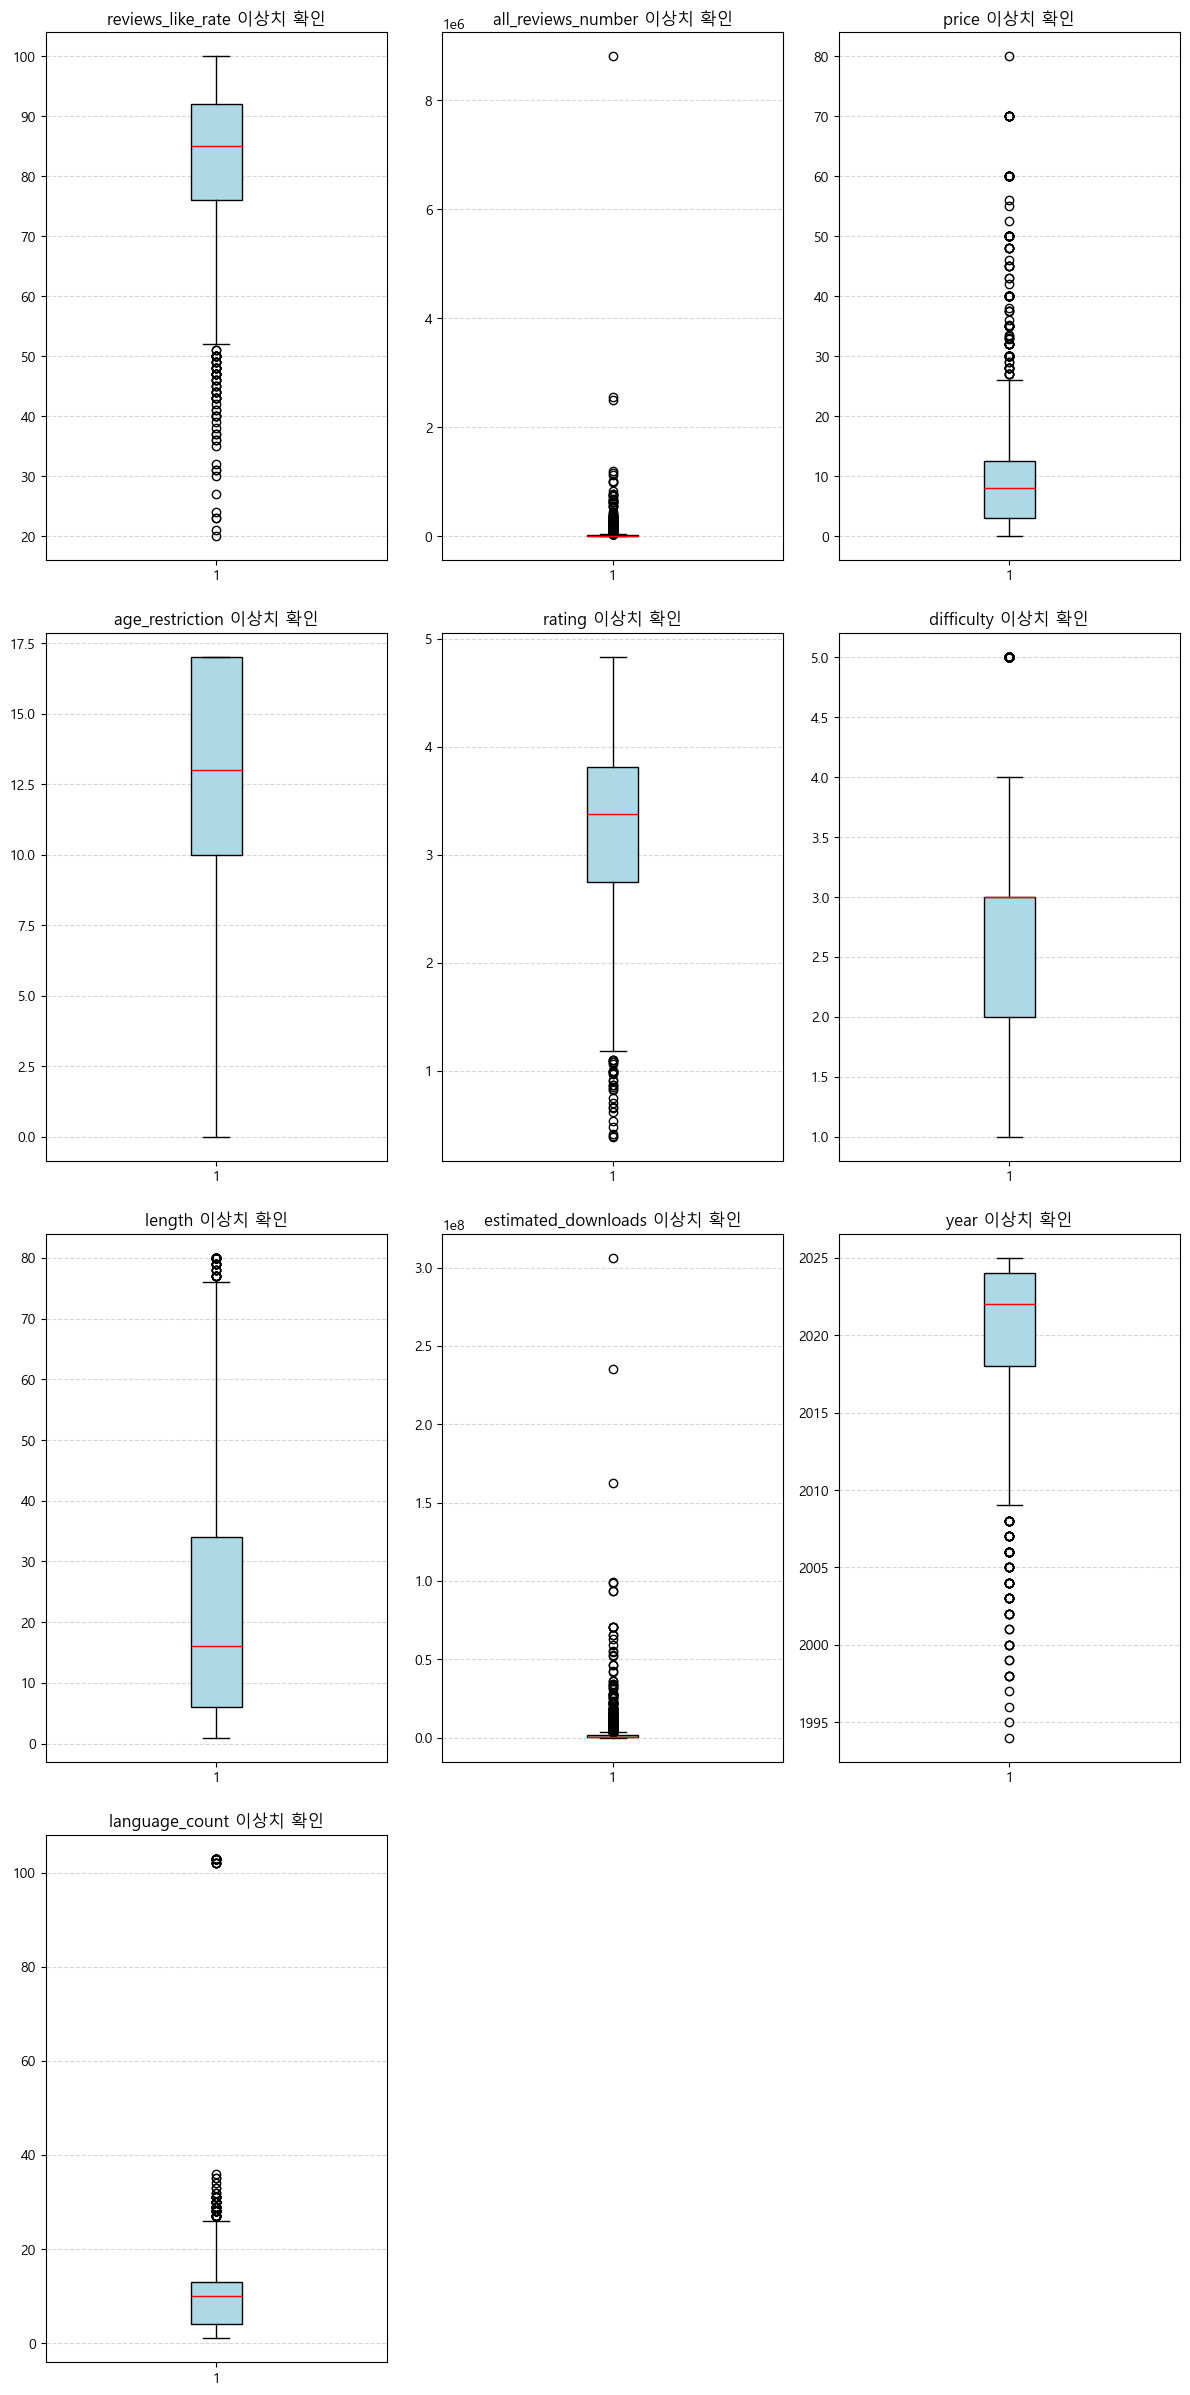

In [10]:
#이상치 확인
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
numeric_cols=d.select_dtypes(include=['number']).columns
n_cols = 3
n_rows = len(numeric_cols)
plt.figure(figsize=(12, n_rows * 6))

for i, col in enumerate(numeric_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    box = ax.boxplot(d[col].dropna(), patch_artist=True)
    
    box['boxes'][0].set_facecolor('lightblue') # 박스 색상
    box['medians'][0].set_color('red')         # 중앙값 선 색상 (빨간색)
    
    ax.set_title(f'{col} 이상치 확인', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
#판매량(estimated_downloads)과 지원 언어의 수(language_count) 이상치 처리 필요 확인
#대부분의 게임은 판매량이 낮지만 소수의 게임들이 높은 판매량을 보임-로그 변환
#지원 언의 수 경우 극 소수의 게임이 비정상적으로 100개가 넘는 언어를 지원하고 있고
#해당 게임들의 경우 언어지원이 사실상 필요 없는 게임 퍼즐, 캐주얼 게임임을 확인-관련 분석시 제거
#다른 변수의 경우 이후 분석 과정에서 문제가 있을 시 다시 처리 예정
import numpy as np
dd=d.copy()
dd['log_downloads']=np.log1p(dd['estimated_downloads'])

In [ ]:
#task 3
#분석 목적/인사이트 설명 - 게임의 장르, 가격, 좋아요 비, 출시연도 등의 특성이 서로 어떤 관계를 맺고 있으며 
#판매량(예상된 다운로드 건수)에 어떤 영향을 미치는 지 파악한다.

In [ ]:
#task 4

                  price  log_downloads
price          1.000000       0.310066
log_downloads  0.310066       1.000000


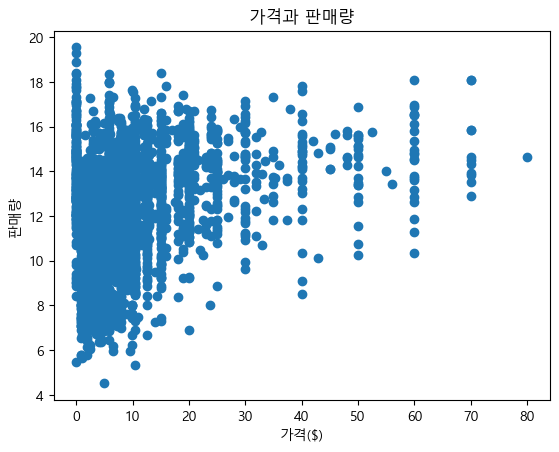

In [12]:
#게임의 가격과 판매량의 상관관계
print(dd[['price','log_downloads']].corr())
plt.scatter(dd['price'],dd['log_downloads'])
plt.title('가격과 판매량')
plt.xlabel('가격($)')
plt.ylabel('판매량')
plt.show()

In [ ]:
#무료 게임 포함시 게임 가격과 판매량간의 약한 상관관계를 보임

                  price  log_downloads
price          1.000000       0.393687
log_downloads  0.393687       1.000000


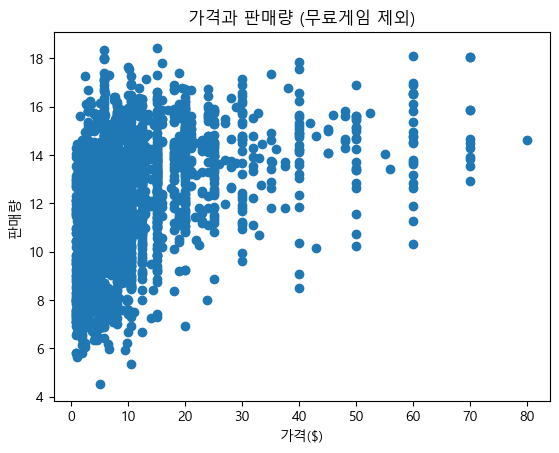

In [13]:
paidgame=dd[dd['price'] > 0]
print(paidgame[['price','log_downloads']].corr())
plt.scatter(paidgame['price'],paidgame['log_downloads'])
plt.title('가격과 판매량 (무료게임 제외)')
plt.xlabel('가격($)')
plt.ylabel('판매량')
plt.show()

In [50]:
#무료 게임을 제외하더라도 게임 가격과 판매량간의 상관관계는 약함
#게임 가격은 판매량에 주요 원인이라고 보기 힘듬
#높은 게임 가격이 게임 제작 및 홍보비의 영향이라고 볼때 
#게임 시장은 단순 자본의 크기로 지배되는 시장이 아닌 것으로 예상됨

                language_count  log_downloads
language_count        1.000000       0.195628
log_downloads         0.195628       1.000000


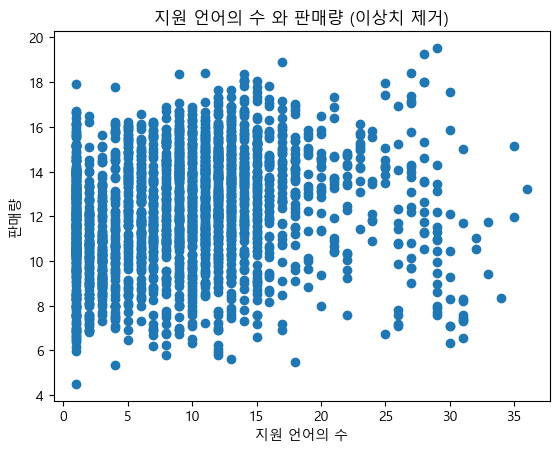

In [14]:
dd_filtered = dd[dd['language_count'] <= 100].copy()
print(dd_filtered[['language_count','log_downloads']].corr())
plt.scatter(dd_filtered['language_count'],dd_filtered['log_downloads'])
plt.title('지원 언어의 수 와 판매량 (이상치 제거)')
plt.xlabel('지원 언어의 수')
plt.ylabel('판매량')

plt.show()

In [ ]:
#이상치를 제거해도 약한 상관관계를 보임
#다양한 국가의 구매자들을 겨냥해 많은 언어를 지원 한다 
#해도 판매량과 직접적인 관련이 있다고 보기 힘듬

In [19]:
#장르와 판매량의 상관관계
#장르별 게임 수와 판매량
dd['genre_list'] = dd['user_defined_tags'].str.split(',')
dd_exploded=dd.explode('genre_list')
dd_exploded['genre_list'] = dd_exploded['genre_list'].str.strip()
dd_exploded=dd_exploded[dd_exploded['genre_list']!='']
genre_stats = dd_exploded.groupby('genre_list')['estimated_downloads'].agg(['count', 'sum'])
genre_stats.columns=['Game_Count', 'Total_Sales']
genre_stats

,Game_Count,Total_Sales
genre_list,,
2.5D,16,4785100
2D,308,511671105
Action,730,2998053247
Adventure,523,700942130
Anime,129,106169860
Automation,36,35828500
Building,176,404617138
CRPG,11,6182600
Card Game,48,65627800


                 Game_Count  Total_Sales_Log
Game_Count          1.00000          0.64089
Total_Sales_Log     0.64089          1.00000


                 Game_Count  Total_Sales_Log
Game_Count          1.00000          0.64089
Total_Sales_Log     0.64089          1.00000


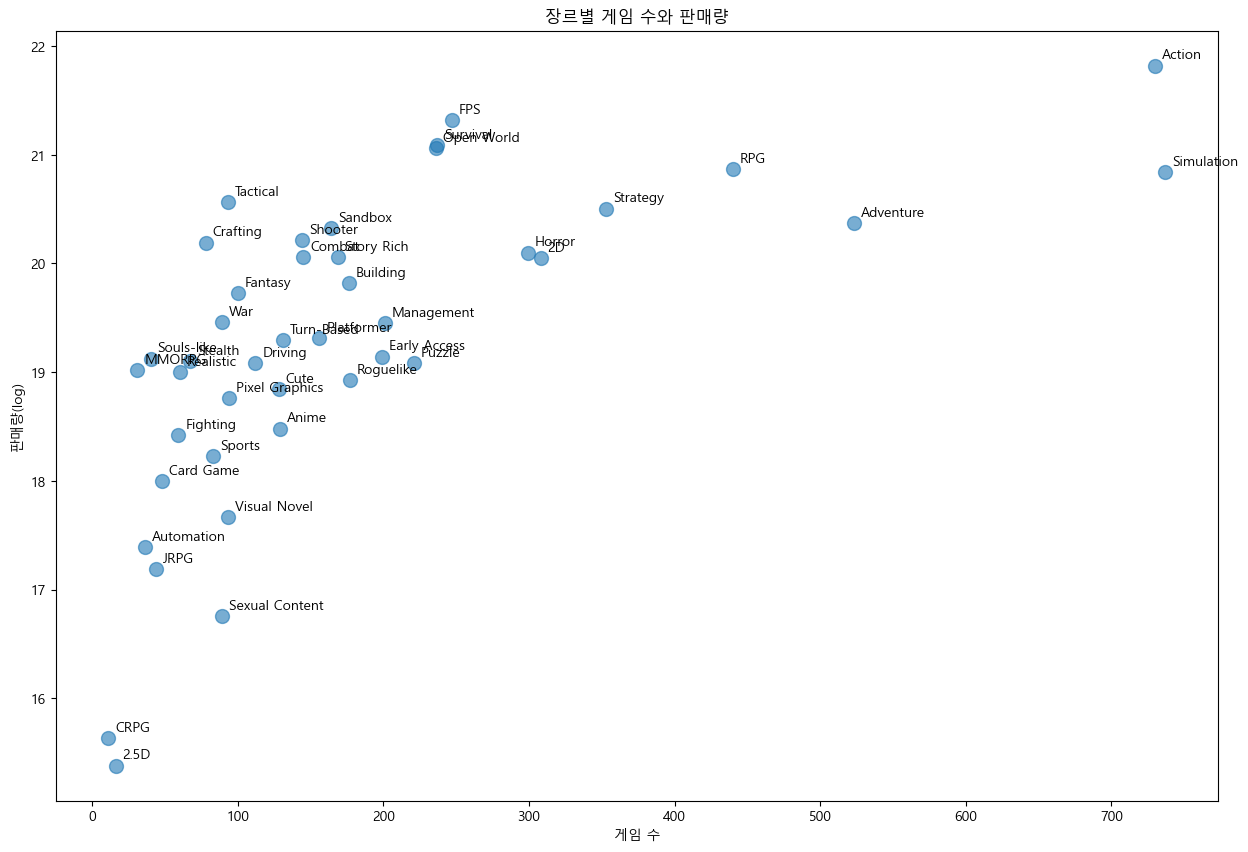

In [23]:
#장르별 게임수와 판매량의 상관관계'
genre_stats['Total_Sales_Log'] = np.log1p(genre_stats['Total_Sales'])
print(genre_stats[['Game_Count','Total_Sales_Log']].corr())
plt.figure(figsize=(15, 10))
plt.scatter(genre_stats['Game_Count'], genre_stats['Total_Sales_Log'], s=100, alpha=0.6)

for i, txt in enumerate(genre_stats.index):
    plt.annotate(txt, (genre_stats['Game_Count'].iat[i], genre_stats['Total_Sales_Log'].iat[i]), 
                 xytext=(5, 5), textcoords='offset points')

plt.title('장르별 게임 수와 판매량')
plt.xlabel('게임 수')
plt.ylabel('판매량(log)')
plt.show()


In [ ]:
#0.6이상의 뚜렷한 상관계수를 보이며 게임이 많이 출시되는 장르가 시장 규모도 그만큼 크다는 것을 보여줌
#현재 게임 시장의 새로운 시도 없는 획일적인 게임들이 다수인 이유라고 볼 수 있음